In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\UNH Materials\ml-zoomcamp-2024\6. Trees\jamb_exam_results.csv")

In [3]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [6]:
del df['student_id']

In [7]:
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [8]:
df.describe()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,age,assignments_completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,22.000000,5.000000


In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = (df_train.jamb_score).astype('int').values
y_val = (df_val.jamb_score).astype('int').values
y_test = (df_test.jamb_score).astype('int').values
 
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [ ]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]

## Q1. 

In [20]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
X_train

<3000x29 sparse matrix of type '<class 'numpy.float64'>'
	with 45000 stored elements in Compressed Sparse Row format>

In [21]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level=None', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [35]:
# Prediction
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
 
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict(X_val)
 
np.sqrt(mean_squared_error(y_val, y_pred))

45.80335905740839

In [30]:
from sklearn.tree import export_text
print(export_text(dt))

|--- feature_27 <= 18.50
|   |--- value: [155.24]
|--- feature_27 >  18.50
|   |--- value: [188.59]



In [31]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



#### Ans. Study hours per week


## Q2

In [34]:
# n_estimators - number of models we want to use
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
 
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))
 
# rf.predict(X_val[[0]])

41.82546234054084

## Q3

In [36]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
     
    scores.append((n, rmse))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'RMSE'])
df_scores

,n_estimators,RMSE
0,10,41.825462
1,20,41.196026
2,30,40.856505
3,40,40.666372
4,50,40.678118
5,60,40.603901
6,70,40.534604
7,80,40.403940
8,90,40.376523
9,100,40.430283


### 80

In [43]:
scores = []
 
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth = d, n_estimators=n, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, rmse))
 
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,41.072512
1,10,20,40.853494
2,10,30,40.623382
3,10,40,40.334002
4,10,50,40.319870


In [44]:
df_scores.groupby('max_depth')['rmse'].mean()

max_depth
10    40.365023
15    40.639766
20    40.684563
25    40.611362
Name: rmse, dtype: float64

## Q5

In [45]:
rf = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
 
# y_pred = rf.predict(X_val)
# np.sqrt(mean_squared_error(y_val, y_pred))

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [49]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
27,study_hours_per_week,0.246331
4,attendance_rate,0.148986
5,distance_to_school,0.134925
28,teacher_quality,0.082243
2,age,0.069812


## Q6

In [60]:
features = dv.feature_names_
features = [f.replace('<', 'less ') for f in features]
features

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level=None',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [61]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [62]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [63]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [64]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [65]:
scores['eta=0.3'] = parse_xgb_output(output_03)

In [66]:
%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [67]:
scores['eta=0.1'] = parse_xgb_output(output_01)

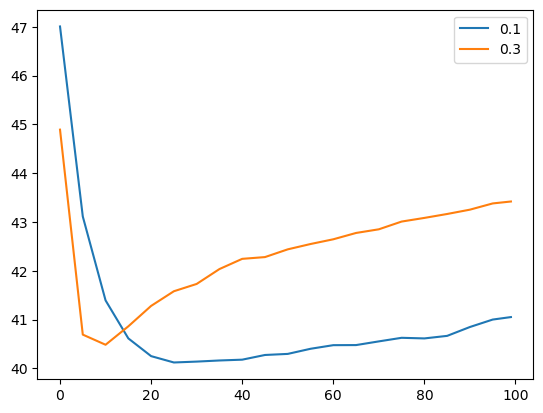

In [68]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()